# **Choosing the right Model**

In [ ]:
#importing the libraries 
import numpy as np # linear algebra
import pandas as pd # data processing with CSV 
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import scipy.stats as stats
import pylab
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

In [ ]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
#data2=pd.read_csv("/content/drive/MyDrive/ObesityDataSet_raw_and_data_sinthetic.csv", sep = ",")
data.name = "data"
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# We need to check missing values in dataset
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:

data.replace([np.inf, -np.inf], np.nan)

data.dropna(inplace=True)

In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    2087
True       24
dtype: int64


In [ ]:
# Remove row of missing value
data.dropna(inplace=True)

In [ ]:
data = data.drop_duplicates()

In [ ]:
# To check duplicated values 
print(data.duplicated().value_counts()) 

False    2087
dtype: int64


# **Dropping unnecessary column.**

We are only keeping the variables that we discussed in data cleaning as important and dropping rest of the columns

In [ ]:
drop_list = ["FAVC","NCP","SMOKE","CH2O","SCC","FAF","TUE"]
data.drop(drop_list,axis=1,inplace=True)

In [ ]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CAEC,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,2.0,Sometimes,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,3.0,Sometimes,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,2.0,Sometimes,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,3.0,Sometimes,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,2.0,Sometimes,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
# create dummy variables
data = pd.get_dummies(data,columns=["Gender","family_history_with_overweight",
                                          "CAEC","CALC","MTRANS"])
data.head()

,Age,Height,Weight,FCVC,NObeyesdad,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,CAEC_Always,...,CAEC_no,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21.0,1.62,64.0,2.0,Normal_Weight,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,21.0,1.52,56.0,3.0,Normal_Weight,1,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,23.0,1.80,77.0,2.0,Normal_Weight,0,1,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,27.0,1.80,87.0,3.0,Overweight_Level_I,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,22.0,1.78,89.8,2.0,Overweight_Level_II,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
# split dataset in features and target variable

# Features
x = data.drop(columns=["NObeyesdad"])

# Target variable
y = data['NObeyesdad'] 

# **Splitting test and train data**

Importing required libraries and splitting data in to test and train. It's always better to go for 80 and 20 split.

In [ ]:
#creating train and test splits, It will always be better to divided in 80 and 20 ratio.
#importing the required libraries 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn_pandas import DataFrameMapper
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.2, shuffle=False)

# **Comparing differnt models**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler # Import for standard scaling of the data
from sklearn.preprocessing import MinMaxScaler # Import for standard scaling of the data

# standard scale data
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# tested MinMaxScaler as KNN historically does better with MinMax
mm = MinMaxScaler()
X_train_mm_scaled = ss.fit_transform(X_train)
X_test_mm_scaled = ss.transform(X_test)
# program to run multilple models though sklearn 
# Default settings output accuracy and classification report
# compares accuracy for scaled and unscaled data
def run_models(X_train: pd.DataFrame , y_train: pd.DataFrame, X_test: pd.DataFrame, y_test: pd.DataFrame):
    
    models = [          
          ('Random Forest', RandomForestClassifier(random_state=2020)),
          ('Decision Tree', DecisionTreeClassifier()),                                                 
          ('KNN', KNeighborsClassifier()),
          ('SVM', SVC())
        ]  
    
    for name, model in models:        
        # unscaled data
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        
        # scaled data
        clf_scaled = model.fit(X_train_scaled, y_train)
        y_pred_scaled = clf_scaled.predict(X_test_scaled)
        
        # mm scaled data
        clf_mm_scaled = model.fit(X_train_mm_scaled, y_train)
        y_pred_mm_scaled = clf_scaled.predict(X_test_mm_scaled)
         
        # accuracy scores
        accuracy = round(metrics.accuracy_score(y_test, y_pred),5)
        scaled_accuracy = round(metrics.accuracy_score(y_test, y_pred_scaled),5)
        scaled_mm_accuracy = round(metrics.accuracy_score(y_test, y_pred_mm_scaled),5)
        
        # output
        print(name + ':')        
        print("---------------------------------------------------------------")      
        print("Accuracy:", accuracy)
        print("Accuracy w/Scaled Data (ss):", scaled_accuracy)
        print("Accuracy w/Scaled Data (mm):", scaled_mm_accuracy)
        if (accuracy > scaled_accuracy) and (accuracy > scaled_mm_accuracy):
            print("\nClassification Report:\n", metrics.classification_report(y_test, y_pred))      
            print("                            -----------------------------------               \n")      
        elif (scaled_accuracy > scaled_mm_accuracy):
            print("\nClassification Report (ss):\n", metrics.classification_report(y_test, y_pred_scaled))      
            print("                            -----------------------------------               \n")     
        else:            
            print("\nClassification Report (mm):\n", metrics.classification_report(y_test, y_pred_mm_scaled))      
            print("                            -----------------------------------               \n")             

In [ ]:
#run Decision Trees, Random Forest, KNN and SVM
run_models(X_train, Y_train, X_test, Y_test)

Random Forest:
---------------------------------------------------------------
Accuracy: 1.0
Accuracy w/Scaled Data (ss): 1.0
Accuracy w/Scaled Data (mm): 1.0

Classification Report (mm):
                   precision    recall  f1-score   support

 Obesity_Type_II       1.00      1.00      1.00       106
Obesity_Type_III       1.00      1.00      1.00       312

        accuracy                           1.00       418
       macro avg       1.00      1.00      1.00       418
    weighted avg       1.00      1.00      1.00       418

                            -----------------------------------               

Decision Tree:
---------------------------------------------------------------
Accuracy: 0.97847
Accuracy w/Scaled Data (ss): 0.97847
Accuracy w/Scaled Data (mm): 0.94019

Classification Report (ss):
                   precision    recall  f1-score   support

  Obesity_Type_I       0.00      0.00      0.00         0
 Obesity_Type_II       0.93      0.99      0.96       106
Obes

# **Insights from models**

From above we can see the accuracy of each and every model, Random Forest has best accuracy followed by Decision trees as expected. And SVM has worst accuracy. Since Random forest seems like too perfect fit for the data set we will discuss and focus on decision tree.

**Decision tree** has 0.98 accuracy and f score in 90s.

In [ ]:
from sklearn import tree
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X_train, Y_train) # fitting the decision tree model

**Feature Importance in model**

Our decision tree model is highly dependent on weight, height and age variable, not much on other variables.

<BarContainer object of 21 artists>

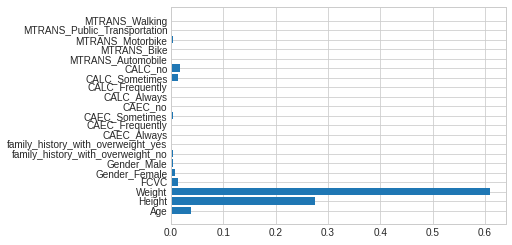

In [ ]:
plt.barh(x.columns, clf.feature_importances_)

# **Decision Trees**

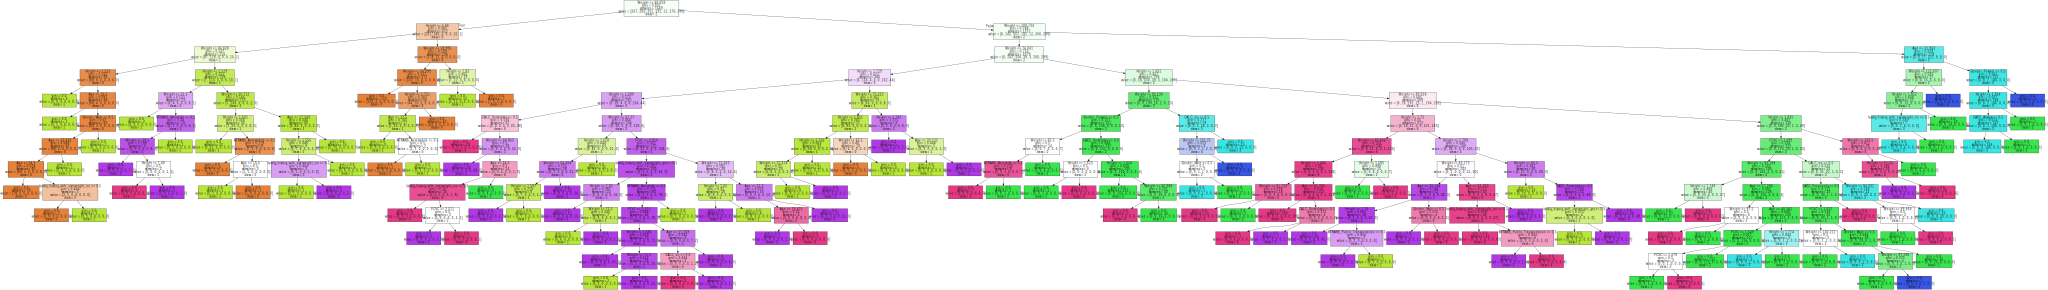

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=x.columns,  
                                class_names=["0","1","2","3","4","5","6"],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

# **Shap Analysis**

In [ ]:
!pip install shap
#Installing SHAP

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 5.4 MB/s 


In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer( clf )

shap_values = explainer.shap_values( X_test )


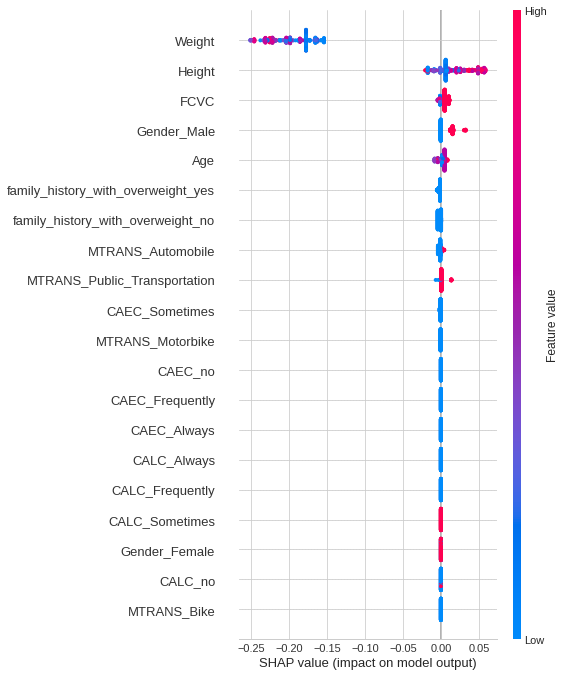

In [ ]:
shap.summary_plot( shap_values[1], X_test, plot_type = 'dot' )

We can see from above that the model is higly based on weight and height and rest of them are not so significant.

# **Force plot**

from below considering below plot we can suggest the model while mainly based on weight and height, it is still often dependend on age, gender, MTRANS and other variables.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test)

# **Individual force plot**

For this individual instance the o/p is highly depended on weight on positive not and slightly on height and gender(male) on negative not as shown below.

In [ ]:
# plot the SHAP values for the 10th observation 
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1][10,:], X_test.iloc[10,:]) 

# **Observations:**

**Decision tree** is the best model for our multiclass classification dataset.

From Variable importance graph:

Weight, Height, and Age shows high importance in predicting the target varible 

From Shap Analysis

Weight, and Height shows high importance in predicting the target varible.
While other showed very little. 

# **References:**

https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d

https://www.kaggle.com/code/cristianlazoquispe/automl-h2o-shap-explanation/notebook

https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

Model comparision is inspired from 

https://www.kaggle.com/code/pmrich/obesitydataset-eda-data-prep-ml-hypertuning

All other code and function implementation are independently written.

**Thanks & Regards,**

Sri Venkata Satya Akhil Malladi

